### Planetary Orbit in Newtonian Gravity

The Lagrangian is given by :

$$ \mathcal{L}=\dfrac{1}{2}m(\dot{r}^2+r^2\dot{\phi}^2)+\dfrac{GMm}{r} $$

Using Euler-Lagrangian equation for the $ \phi $ coordinate, we get a constant of motion, $L=r^2\dot{\phi}$. This quantity is known as the specific angular momentum of the test particle.
Next, for the radial coordinate $r$, we get the equation :

$$ \ddot{r}=\dfrac{L^2}{r^3}-\dfrac{GM}{r} $$

Now, we make the change of variable as : $ u(r)= 1/r$. Then, 

$$ \dot{r}=-u'L $$
and $$ \ddot{r}=-L^2u''u^2 $$

Using above equations we get the ODE :

$$ u''+u=\dfrac{GM}{L^2} $$

To solve this ODE numerically, we shall write it as two couples first order ODEs as below :

$$ \dot{u}=v $$
$$ \dot{v}=\dfrac{GM}{L^2}-u $$

In [198]:
import numpy as np
import matplotlib.pyplot as plt

In [199]:
# Defining the Physical Constants

G = 6.67*10**-11                    # Universal Gravitational Constant
M = 2*10**30                        # Mass of Sun
AU = 1.496*10**11                   # Astronomical Unit (A.U.)
L_earth = 4.4536*10**15             # Angular momentum of Earth per unit mass
L_mercury = 2.7701*10**15           # Angular momentum of Mercury per unit mass
merc_per = 0.307499*AU              # Perihelion distance of Mercury
earth_per = 0.9832899*AU            # Perihelion distance of Earth

In [200]:
# Defining the derivative function
# Here x = angular coordinate (phi)
# and y = [r, v]

def ddx(x,y):
    u = y[0]
    v = y[1]
    return np.array([v,G*M/L**2-u])

In [201]:
# Defining the rk4 method

def rk4(f,x,y,h):
    k1 = h*f(x,y)
    k2 = h*f(x+h/2,y+k1/2)
    k3 = h*f(x+h/2,y+k2/2)
    k4 = h*f(x+h,y+k3)
    return y+(k1+2*k2+2*k3+k4)/6

In [202]:
# Defining the Caller Function

def Caller(mtd,f,xs,y_ini,h):
    N = len(xs)
    y = y_ini
    ys = np.zeros((N,2),float)
    for i in range(N):
        x = xs[i]
        ys[i] = y
        y = mtd(ddx,x,y,h)
    return ys

In [203]:
# Initial Conditions

r0 = 1*merc_per                           # Initial Radial Position
u0 = 1/r0
v0 = 0                                      # Initial Radial Velocity
y_ini = np.array([u0,v0])
L = 1.0*L_mercury                           # Angular momentum per unit mass

# Time step

h = 0.001

In [204]:
# Getting a solution

n = 1                                        # Number of revolutions
xs = np.arange(0,2*np.pi*n+h,h)              # Stores the angular coordinates
ys = Caller(rk4,ddx,xs,y_ini,h)              # Stores the radial coordinates and radial velocities

u = ys[:,0]
r = 1/u                                  # Stores just the radial coordinates
phi_dot = L/r**2
r = r/AU                                 # Normalizes the radial distance w.r.t. 1 A.U.

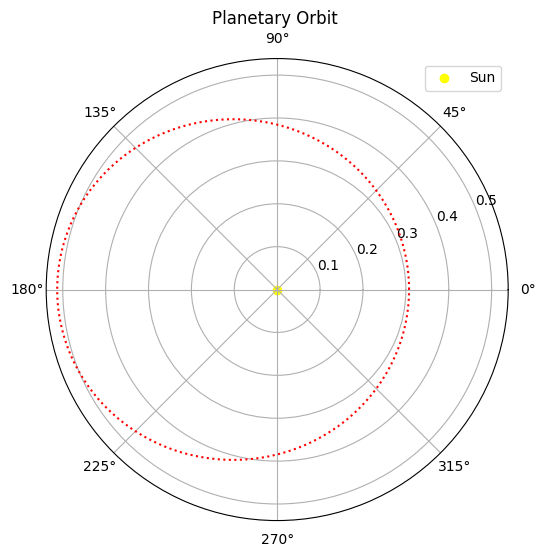

In [205]:
# Visualizing the Polar Plot

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar = True)
ax.plot(xs,r,linestyle = "dotted",c = "red")
ax.scatter([0],[0],label="Sun",c="Yellow",marker = "o")
plt.title("Planetary Orbit ")
plt.legend()
plt.show()


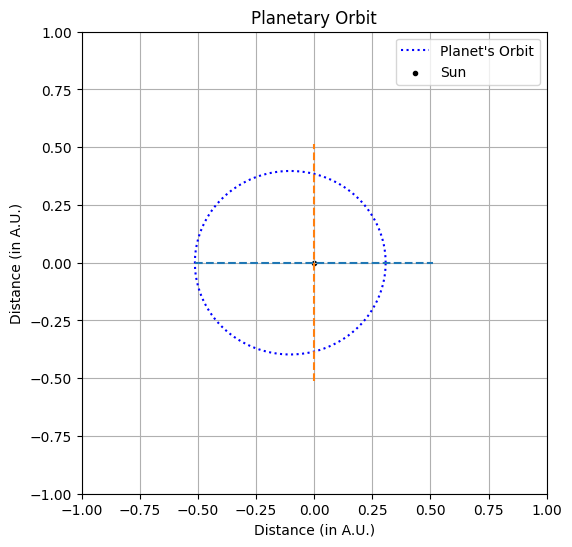

In [206]:
# In Cartesian Coodinates

x_ax = np.zeros((len(r),),float)
y_ax = np.zeros((len(r),),float)

l = 0

for i in range(len(r)):
    x_ax[i]=r[i]*np.cos(xs[i])
    y_ax[i]=r[i]*np.sin(xs[i])
    if l<abs(x_ax[i]):
        l=abs(x_ax[i])
    if l<abs(y_ax[i]):
        l=abs(y_ax[i])

q = 0.0

plt.figure(figsize=(6,6))
plt.plot(x_ax,y_ax,c='blue',linestyle = 'dotted',label="Planet's Orbit")
plt.plot([-l,l],[0,0],linestyle = 'dashed')
plt.plot([0,0],[-l,l],linestyle = 'dashed')
plt.scatter([0],[0],marker='.',c='black',label="Sun")
plt.xlabel("Distance (in A.U.)")
plt.ylabel("Distance (in A.U.)")
plt.title("Planetary Orbit")
plt.xlim(-10**-q,10**-q)
plt.ylim(-10**-q,10**-q)
plt.grid()
plt.legend()
plt.show()

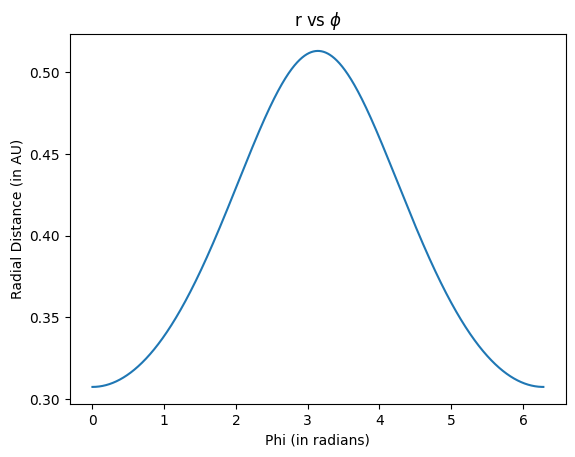

In [207]:
# r vs phi

plt.plot(xs,r)
plt.title("r vs ${\phi}$")
# plt.plot([0,max(days)],[max(r),max(r)],linestyle = "dotted",label = "Aphelion")
# plt.plot([0,max(days)],[min(r),min(r)],linestyle = "dotted",label = "Perihelion")
plt.ylabel("Radial Distance (in AU)")
plt.xlabel("Phi (in radians)")
plt.show()